### Dataset
### Nombre: Factores de rendimiento de los estudiantes
Información sobre el rendimiento de los estudiantes y los factores que contribuyen a él.
  
**Descripción**
Conjunto de datos proporciona una descripción general completa de los diversos factores que afectan el desempeño de los estudiantes en los exámenes. Incluye información sobre los hábitos de estudio, la asistencia, la participación de los padres y otros aspectos que influyen en el éxito académico.

### Columnas

* Hours_Studied: Número de horas dedicadas al estudio por semana.
* Attendance: Porcentaje de clases asistidas.
* Parental_Involvement: Nivel de participación de los padres en la educación del estudiante (Bajo, Medio, Alto).
* Access_to_Resources: Disponibilidad de recursos educativos (Baja, Media, Alta).
* Extracurricular_Activities: Participación en actividades extracurriculares (Sí, No).
* Sleep_Hours: Número promedio de horas de sueño por noche.
* Previous_Scores: Puntuaciones de exámenes anteriores.
* Motivation_Level: Nivel de motivación del estudiante (Bajo, Medio, Alto).
* Internet_Access: Disponibilidad de acceso a Internet (Sí, No).
* Tutoring_Sessions: Número de sesiones de tutoría a las que asistimos por mes.
* Family_Income: Nivel de ingreso familiar (Bajo, Medio, Alto).
* Teacher_Quality: Calidad de los docentes (Baja, Media, Alta).
* School_Type: Tipo de escuela a la que asiste (pública, privada).
* Peer_Influence: Influencia de los pares en el rendimiento académico (Positiva, Neutral, Negativa).
* Physical_Activity: Número promedio de horas de actividad física por semana.
* Learning_Disabilities: Presencia de discapacidades de aprendizaje (Sí, No).
* Parental_Education_Level: Nivel más alto de educación de los padres (secundaria, universidad, posgrado).
* Distance_from_Home: Distancia del hogar a la escuela (Cerca, Moderada, Lejos).
* Gender: Género del estudiante (Masculino, Femenino).
* Exam_Score: Puntuación del examen final.

### Pregunta problema

¿Existen factores que influyan en el rendimiento de los estudiantes?

In [23]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
mpl.style.use('bmh')

In [3]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/gafifran/cienciaDatos1/main/StudentPerformanceFactors.csv'
df_estudiantes = pd.read_csv(url, sep = ',')
df_estudiantes.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## Correlación

In [30]:
df_numerico = df_estudiantes.select_dtypes(include='number')
correlaciones_absolutas = abs(df_numerico.corr(method='pearson')['Exam_Score'])
df_numerico.corr(method='pearson')['Exam_Score'][(correlaciones_absolutas < 1) & (correlaciones_absolutas > 0)].sort_values(ascending=False)

Attendance           0.581072
Hours_Studied        0.445455
Previous_Scores      0.175079
Tutoring_Sessions    0.156525
Physical_Activity    0.027824
Sleep_Hours         -0.017022
Name: Exam_Score, dtype: float64

## Matplotlib

### Histograma

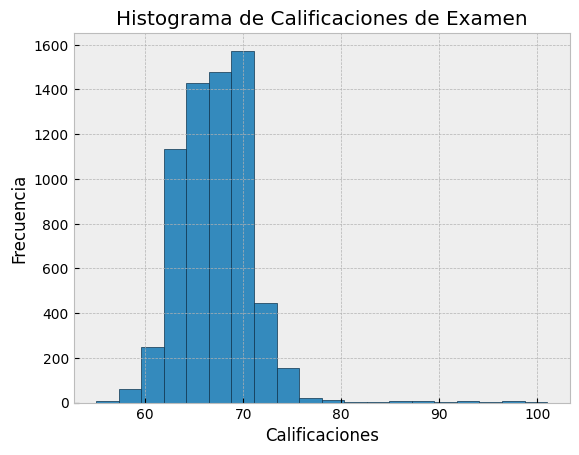

In [26]:
# Extract the date and close price columns
x = df_estudiantes['Exam_Score']

plt.hist(x, bins=20, edgecolor='#0d334d')
plt.xlabel('Calificaciones')
plt.ylabel('Frecuencia')
plt.title('Histograma de Calificaciones de Examen')
plt.grid(True)

plt.show()

Comentarios

* Una cantidad significativa de estudiantes obtuvo una calificación entre 65 y 70 puntos.

* Las calificaciones entre 75 y 100 se encuentran entre pocos alumnos.

* Existe una calificación mayor a 100 puntos. Valdría la pena investigar si el examen permite obtener puntajes superiores a 100.

### Boxplot

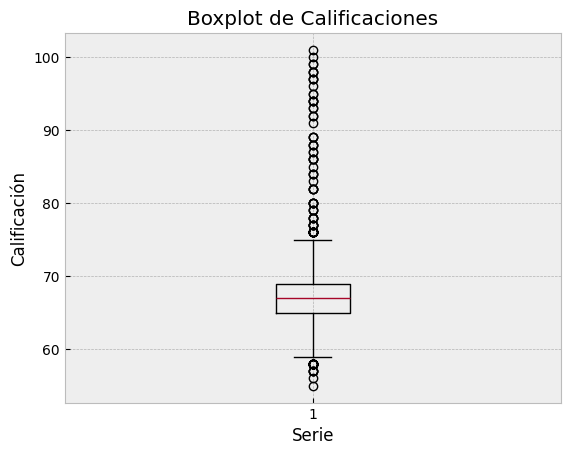

In [60]:
plt.boxplot(df_estudiantes['Exam_Score'])

plt.xlabel('Serie')
plt.ylabel('Calificación')

# Agregar título a la gráfica
plt.title('Boxplot de Calificaciones')

# Mostrar la gráfica
plt.show()

Observaciones

* La media de calificaciones se encuentra debajo de los 70 puntos y sobre los 65 puntos. Existen múltiples puntos que se encuentran lejos de la media.

### Linechart

In [72]:
resumen_estudio_distancia = df_estudiantes[['Hours_Studied','Distance_from_Home']].groupby(by=['Distance_from_Home']).sum().reset_index()

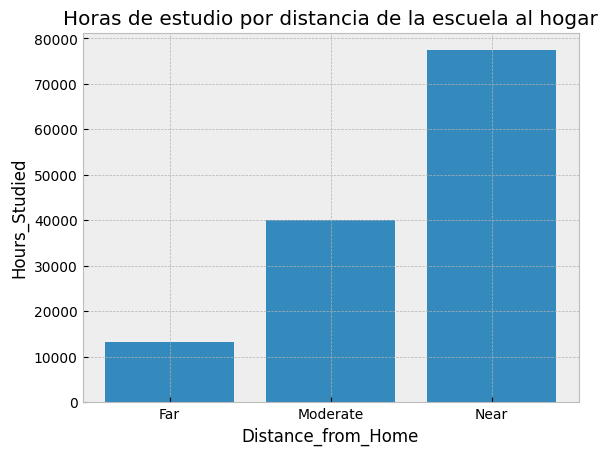

In [76]:
plt.bar(resumen_estudio_distancia['Distance_from_Home'],resumen_estudio_distancia['Hours_Studied'])

plt.xlabel('Distance_from_Home')
plt.ylabel('Hours_Studied')
plt.title('Horas de estudio por distancia de la escuela al hogar')

plt.show()

Observaciones

* Los estudiantes que viven aq una distancia "cercana" de la escuela acumulan más horas de estudio que sus homólogos a disntancias mayores. Siendo los estudiantes que viven a mayor distancia los que dedican menos horas al estudio respecto a una distancia moderada o cercana.

## SEABORN

### Calificaciones respecto al factor disponibilidad de recursos educativos

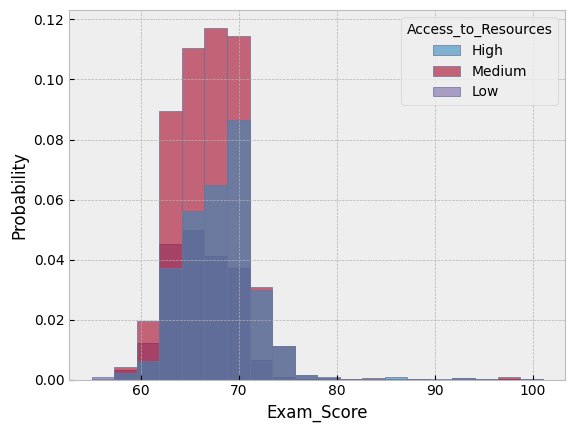

In [58]:
plt.figure()
sns.histplot(data = df_estudiantes,
             x = 'Exam_Score',
             alpha = 0.6,
             edgecolor = '#6B7498',
             stat = 'probability', 
             bins = 20,
             hue = 'Access_to_Resources')
plt.show()

Observaciones

* Los alumnos con menor acceso a los recursos educativos obtienen scores cercanos a los 65 puntos en el examen. Mientras que alumnos con acceso nivel medio y alto tienden a obtener calificaciones entre 65 y 70 puntos.

### Horas de estudio

<Axes: xlabel='Hours_Studied', ylabel='Probability'>

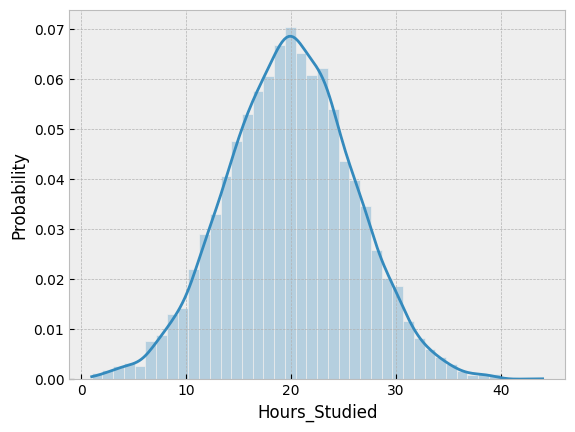

In [51]:
plt.figure()
sns.histplot(data = df_estudiantes,
             x = 'Hours_Studied',
             bins = 42,            
             alpha = 0.3,
             kde = True,
             stat='probability')

Observaciones

* Los estudiantes de la muestra dedican en su mayoría entre 10 y 30 horas a la semana para el estudio, predominan las 20 horas de estudio.

### Asistencia vs Calificaciones

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

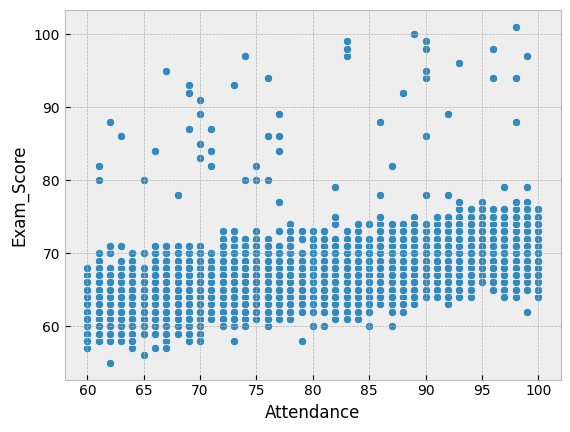

In [32]:
plt.figure()
sns.scatterplot(data = df_estudiantes,
                x = 'Attendance',
                y = 'Exam_Score')

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

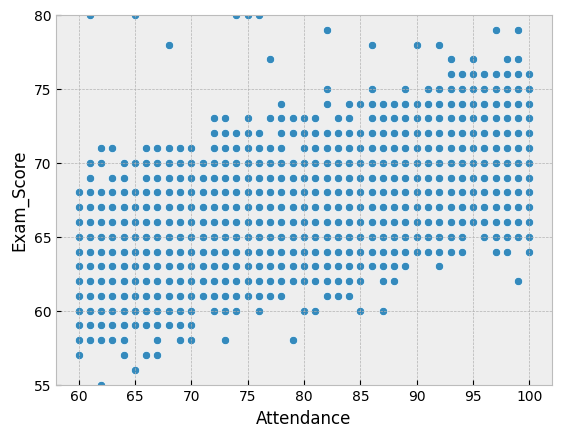

In [35]:
plt.figure()
plt.ylim(55, 80)
sns.scatterplot(data = df_estudiantes,
                x = 'Attendance',
                y = 'Exam_Score')


Observaciones

* Existe una concentración de calificaciones debajo de los 80 puntos que parecen tener un patrón.
* Cambiando los límites de la gráfica se puede apreciar que entre más asistencia los estudiantes tienden a obtener calificaciones sobre los 60 puntos.